<a href="https://colab.research.google.com/github/drpetros11111/Tensorflow_Portilia/blob/Classification/02_Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong>
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and
     prognosis via linear programming. Operations Research, 43(4), pages 570-577,
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994)
     163-171.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

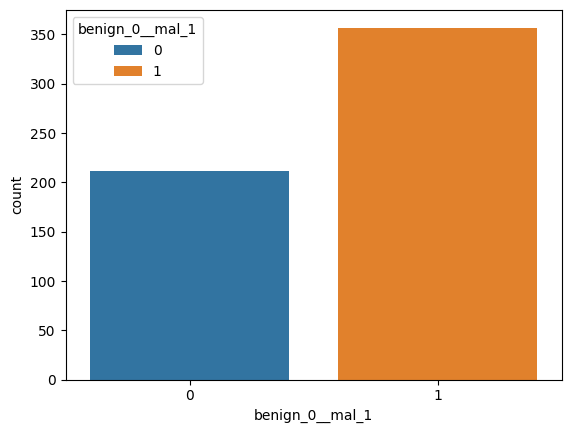

In [8]:
sns.countplot(x='benign_0__mal_1',data=df, hue='benign_0__mal_1')

# Plotting benign & non-benign cancer
-----------------------------
##x='benign_0__mal_1':

This means that the x-axis will display the categories of the benign_0__mal_1 column, which presumably indicates whether a case is benign (0) or malignant (1).

-------------------
#hue='benign_0__mal_1':

This will color the bars by the same variable, splitting the bars by benign_0__mal_1.

Since it's the same variable as on the x-axis, each bar will essentially be split into two bars of the same color.

-----------------------------
#What Happens:
If the values of benign_0__mal_1 are 0 and 1, the plot will show two bars (one for each category), with each bar colored by itself.

--------------------
#For example:
The 0 category will have a bar, split into parts colored by 0 (which will fill the bar entirely).

The 1 category will have a bar, split into parts colored by 1 (which will also fill the bar entirely).

--------------------
#Visual Outcome:
This may result in a visually redundant plot where both bars are fully colored by the same category, which doesn't add any extra information.

---------------------
#Suggested Fix:
If you want to plot just the count of benign vs. malignant cases, you can remove the hue parameter:

-------------------
    sns.countplot(x='benign_0__mal_1', data=df)

This will display a simple count plot showing how many cases are benign (0) and how many are malignant (1).

Alternatively, if you want to use hue to further split the data based on another variable (e.g., gender, age group, etc.), you can specify a different column for the hue parameter, like this:

------------------
    sns.countplot(x='benign_0__mal_1', data=df, hue='some_other_variable')

This will create a plot where the counts of benign vs. malignant cases are split by the some_other_variable.

<Axes: >

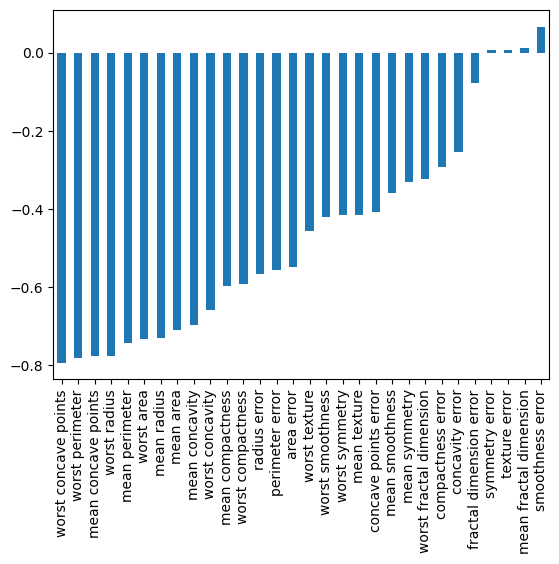

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

# Correlation between all numberical  features and a laber i.e., benign
    df.corr():

This calculates the correlation matrix for the entire DataFrame df.

The correlation matrix shows the pairwise correlation (linear relationship) between all numerical columns in the DataFrame.

In the context of calculating a correlation matrix with df.corr(), the pairwise correlation is computed only between the numerical features of the DataFrame.

If your label (or target variable) is included in the DataFrame and it is numeric, it will also be included in the correlation matrix.

##Pairwise Correlation Between Features and a Label:
If your label is numeric, such as a continuous variable (e.g., price, age, etc.) or even binary (e.g., 0 for benign, 1 for malignant), the correlation between each feature and the label will be calculated as part of the matrix.

##This correlation can give you insight into how each feature relates to the label:
A positive correlation means that as the feature value increases, the label is more likely to increase as well.

A negative correlation means that as the feature value increases, the label is more likely to decrease.

For example, if you're working on a regression task where the target variable is house price (label), the correlation matrix will show how each feature (like square footage, number of bedrooms, etc.) correlates with the price.

--------------------------
Values in the matrix range from -1 to 1:

##1: Perfect positive correlation (as one variable increases, the other increases).

##-1: Perfect negative correlation (as one variable increases, the other decreases).

0: No correlation.

---------------------
##2. df.corr()['benign_0__mal_1']:
This extracts the correlation values between the benign_0__mal_1 column and all other columns in the DataFrame.

The result is a series where each value represents how strongly each feature (column) correlates with benign_0__mal_1.

----------------------------
##3. [:-1]:
This slices the resulting series to exclude the last value.

The last value is most likely the correlation of benign_0__mal_1 with itself, which would always be 1.

By using [:-1], you're removing this perfect correlation to focus on how the other features relate to benign_0__mal_1.

-------------------------
##4. sort_values():
This sorts the correlations in ascending order, meaning the features that have the most negative correlation with benign_0__mal_1 come first, and those with the most positive correlation come last.

-------------------------
##5. .plot(kind='bar'):
This plots the sorted correlation values as a bar chart.

Each bar represents the correlation of a feature with the benign_0__mal_1 column, arranged from lowest (most negative) to highest (most positive).

----------------------
#What Does the Code Do?
The code is trying to visualize how each feature in the DataFrame df correlates with the target variable

##benign_0__mal_1.

This is often used in data exploration to understand which features are strongly related to the target.

---------------------------
#Example:
If df contains columns like 'age', 'tumor_size', 'genetic_marker', etc., and you want to see how these features correlate with whether a case is benign (0) or malignant (1), the resulting bar plot will show which features have the strongest positive or negative relationships with the target.

Positive correlations might indicate that higher values of a feature are associated with malignant cases.

Negative correlations might indicate that higher values of a feature are associated with benign cases.

-------------------
#Summary
This line of code generates a bar plot of the correlations between the target variable benign_0__mal_1 and the other features in the DataFrame df.

The bars are sorted from the most negative to the most positive correlations, helping you visually understand which features are most strongly related to the target variable (either positively or negatively).

This is useful for identifying which features might be good predictors in a machine learning model or for exploratory data analysis.

<Axes: >

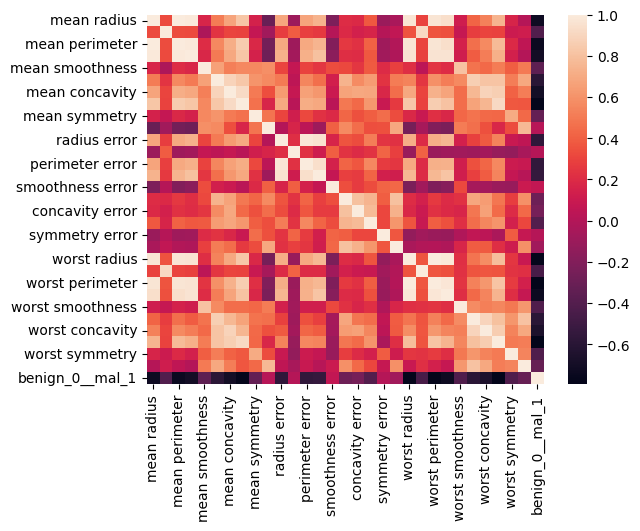

In [10]:
sns.heatmap(df.corr())

# Pairwise Correlation between numerical features in the dataframe

----------------
##df.corr():

This calculates the correlation matrix of the DataFrame df, which measures the pairwise linear relationships between numerical columns.

The result is a square matrix where each value represents the correlation between two columns:

---------------------------
##Values range from -1 to 1:
1: Perfect positive correlation (as one variable increases, so does the other).

-1: Perfect negative correlation (as one increases, the other decreases).

0: No linear relationship between the variables.

    sns.heatmap()

This creates a heatmap where the values of the correlation matrix are represented as different shades of color. By default:

Strong positive correlations (close to 1) will be represented by one color (often darker).

Strong negative correlations (close to -1) will be represented by another color (often lighter).

Values close to zero (little to no correlation) are usually represented by a neutral color.

--------------------
#What Does the Heatmap Show?
The heatmap provides a visual summary of how all the numerical columns in df relate to each other.

Each square in the heatmap corresponds to the correlation between two columns.

Darker shades might represent strong positive or negative correlations, while lighter shades represent weak correlations.

------------------------
#Example Heatmap:
Imagine df has columns like 'age', 'income', 'education_level', and 'health_score'.

The heatmap will show the correlations between all these variables:

If 'income' has a strong positive correlation with 'education_level', the heatmap will show a dark square at the intersection of these two variables.

If 'age' has no correlation with 'health_score', the square will be lighter at their intersection.

-------------------
##Additional Customizations
You can enhance the heatmap for better readability:

Add annotations to display correlation values on the heatmap:

    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

This adds numerical values to each square and uses the coolwarm color palette for more contrast.

Customize the color palette to change how correlations are visualized:

    sns.heatmap(df.corr(), cmap='vlag')

------------------
#Summary
The sns.heatmap(df.corr()) command gives you a visual representation of the correlations between features in your dataset, helping you identify relationships between variables at a glance.

Strong relationships are easy to spot due to the color intensity.

Let me know if you want to dive deeper into customizing or interpreting the heatmap!

In [11]:
df.corr()['benign_0__mal_1'].sort_values()

,benign_0__mal_1
worst concave points,-0.793566
worst perimeter,-0.782914
mean concave points,-0.776614
worst radius,-0.776454
mean perimeter,-0.742636
worst area,-0.733825
mean radius,-0.730029
mean area,-0.708984
mean concavity,-0.696360
worst concavity,-0.659610


<Axes: >

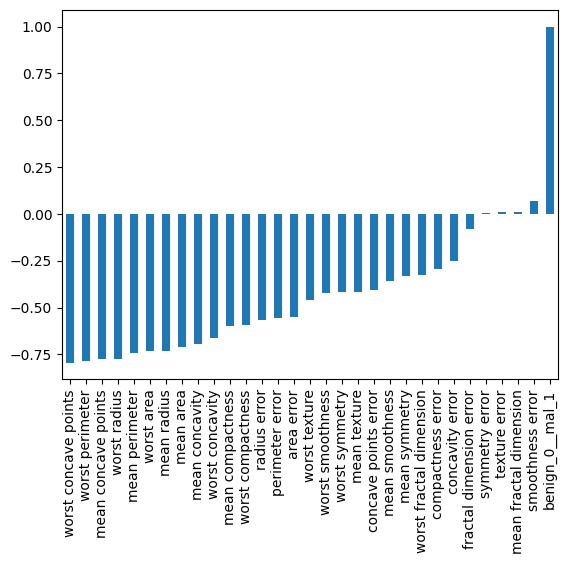

In [12]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

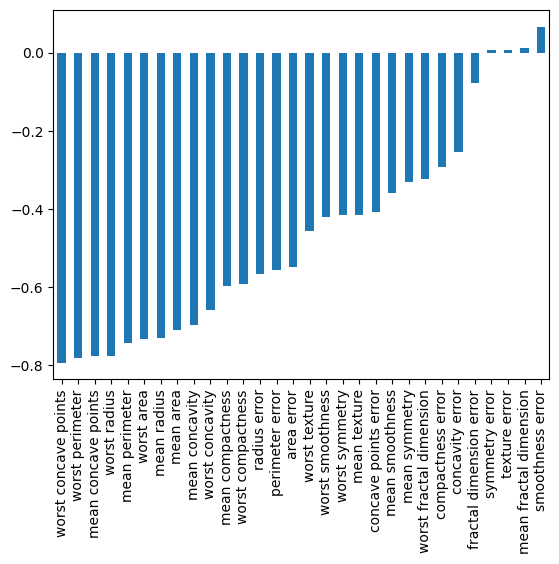

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [14]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [22]:
X_train.shape

(426, 30)

In [23]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model

### Example One: Choosing too many epochs and overfitting!

In [24]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.6464 - val_loss: 0.6219
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6133 - val_loss: 0.5803
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5694 - val_loss: 0.5362
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5210 - val_loss: 0.4903
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4675 - val_loss: 0.4458
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4330 - val_loss: 0.4019
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3829 - val_loss: 0.3588
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3414 - val_loss: 0.3185
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3079 - val_loss: 0.2845
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2899 - val_loss: 0.2596
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2410 - val_loss: 0.2366
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

In [25]:
# model.history.history

In [26]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,0.643110,0.621885
1,0.603163,0.580299
2,0.558634,0.536214
3,0.514057,0.490299
4,0.469821,0.445832


In [27]:
# Convert model loss history to DataFrame
model_loss = pd.DataFrame(model.history.history)

# Add an 'epoch' column (assuming epochs start at 1)
model_loss['epoch'] = model_loss.index + 1

# Display the first few rows of the DataFrame
model_loss.head()


,loss,val_loss,epoch
0,0.643110,0.621885,1
1,0.603163,0.580299,2
2,0.558634,0.536214,3
3,0.514057,0.490299,4
4,0.469821,0.445832,5


# 1. Adding data fields in the model History table

    model.history.history

After you train a model in frameworks like Keras, the model keeps a history of various metrics (like loss, accuracy, validation loss, etc.) for each epoch in an attribute called history.

model.history.history is a dictionary where the keys are metric names (e.g., 'loss', 'val_loss', 'accuracy', etc.), and the values are lists that contain the values of those metrics for each epoch.

    pd.DataFrame(model.history.history)

Converts this dictionary into a Pandas DataFrame.

Each key (e.g., 'loss', 'val_loss', etc.) becomes a column, and the corresponding values (the list of metric values across epochs) become rows.

Each row represents the metrics for one epoch.

-----------------------
# 2. Add an 'epoch' column:

    model_loss['epoch'] = model_loss.index + 1

    model_loss.index

This refers to the index of the DataFrame, which starts at 0.

The index corresponds to the epoch numbers (since each row in model_loss corresponds to the metrics for one epoch).

    model_loss.index + 1

Since epochs generally start from 1 (not 0), adding 1 to the index adjusts the epoch numbering.

    model_loss['epoch']

This creates a new column called 'epoch', where each value corresponds to the epoch number, starting from 1.

---------------------
#3. Display the first few rows of the DataFrame:

    model_loss.head()

This function displays the first 5 rows of the DataFrame, allowing you to quickly inspect the structure of model_loss and the metrics it contains.

----------------------
#Example of What the DataFrame Might Look Like:
After running this snippet, model_loss could look something like this:

      epoch	 loss	    accuracy	val_loss	val_accuracy
         1	0.5689	  0.7500	   0.5890	      0.7300
         2	0.4321	  0.8100	   0.4850	      0.7800
         3	0.3421	  0.8700	   0.4520	      0.7900
         4	0.2856	  0.9100	   0.4310	      0.8000
         5	0.2458	  0.9300	   0.4200	      0.8100

---------------------
#Summary
You first convert the model's training history into a DataFrame.
You then add an epoch column to indicate which epoch corresponds to each row.

Finally, you inspect the first few rows using .head().
This DataFrame will help you analyze how your model's performance metrics (like loss and accuracy) evolved over the epochs.








# Explanation between Loss & Value Loss
In the context of the model_loss DataFrame that stores training history from a neural network model, loss and val_loss (validation loss) represent different aspects of the model's performance during training. Here's the distinction:

------------------------
#1. loss:
This refers to the training loss, which is the error the model makes on the training data at each epoch.

The model optimizes (minimizes) this loss by adjusting the weights and biases using the training dataset.

This metric helps you understand how well the model is fitting the training data.

----------------------------
#2. val_loss (validation loss):
This refers to the loss calculated on the validation data, which is a separate subset of data that the model does not see during training.
After each epoch, the model is evaluated on the validation set to check how well it generalizes to unseen data.

Validation loss is a key metric to detect overfitting: if the training loss decreases but the validation loss starts increasing, it may indicate that the model is learning the training data too well (memorizing) and not generalizing to new data.

---------------------------
#Difference in Use:
Training loss (loss): Shows how well the model is learning on the data it's trained on.

Validation loss (val_loss): Indicates how well the model is performing on unseen data and helps you assess whether the model is overfitting or underfitting.

--------------------------
#Example in the DataFrame:
Your model_loss DataFrame might look like this:

    epoch	  loss	 accuracy	 val_loss	val_accuracy
       1	 0.568     	0.75	    0.589	       0.73
       2	 0.432	    0.81	    0.485	       0.78
       3	 0.342	    0.87	    0.452	       0.79

Here, loss shows how the model's error on the training set decreases as the model improves, while val_loss shows how the model performs on validation data.

------------------------
#Key Insight:
If loss decreases but val_loss increases, this is a sign of overfitting.
If both decrease at a similar rate, your model is likely performing well.


<Axes: >

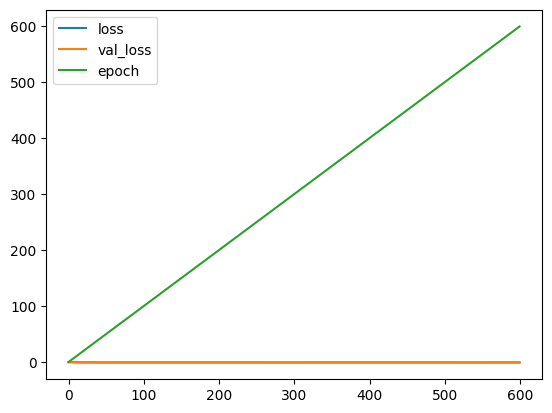

In [28]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [29]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Explaining the Adam Optimizer

The main purpose of momentum in optimization is to accelerate the convergence of the optimizer by considering past gradients, especially in directions where the gradient consistently points in the same direction. This helps the optimizer move faster in relevant directions and dampens oscillations in directions where the gradient changes frequently.

----------------------------------
#The Role of the Optimizer
In machine learning, especially in deep learning, your goal is to train a model to make predictions. You do this by adjusting the parameters (weights and biases) of the model so that its predictions get closer and closer to the correct answers.

The optimizer is like a navigator that helps guide these adjustments. It tells the model how to change its parameters so that it gets better and better at predicting.

----------------------------------------------
#How Does the Optimizer Work?
##Starting Point:

When you begin training your model, the model’s parameters (like weights) are set randomly.

The model makes some predictions, and you measure how far off (or how "bad") these predictions are using a loss function. The goal is to minimize this loss (make the model’s predictions as close to correct as possible).


##Making a Small Change:

The optimizer looks at the loss and figures out how to change the model’s parameters to reduce that loss.

You can think of it like standing on a hill in the fog (the loss function is the hill).

You can’t see the bottom (the minimum loss), but you know which direction slopes downward (that’s the gradient). The optimizer helps you take steps down the hill.

##Momentum (Smooth Movement):

The optimizer doesn’t just take one step at a time based on the current slope. It also remembers past steps.

If it sees that it has been stepping down the hill in the same direction for a while, it will move faster in that direction.

This helps avoid zigzagging or stopping and starting too much.

This is like rolling a ball down the hill. The ball gains speed as it goes in the same direction.

##Adjusting the Step Size:

Sometimes the slope is very steep, and a big step might take you too far or make you miss your goal.

Other times, the slope is gentle, and you might need to take smaller steps to avoid overshooting.

The optimizer adapts the size of its steps, making them bigger when it’s safe to do so and smaller when precision is needed.

##Handling Bumpy Roads (Noise):

The loss landscape (the hill) isn’t always smooth. There can be bumps or small ridges.

A good optimizer will smooth out the bumps and not get stuck on small hills.

It moves steadily toward the best solution.

In deep learning, data can be noisy or inconsistent. The optimizer helps the model not get distracted by these small fluctuations.

##Finishing Up:

Over time, the optimizer guides the model to better and better parameter values (weights and biases) until the loss is minimized, or it stops improving.

------------------------------------------------------------------------
#What Makes Adam Special?
##Adaptation:

Adam is great because it adjusts the size of the steps it takes automatically, so you don’t have to worry as much about tuning things manually.

##Speed and Stability:

It combines two strategies: one for making sure it moves quickly in the right direction (momentum) and another for handling noisy, bumpy loss surfaces (adaptive learning rate).

In simple terms, Adam is like a very smart navigator that:

Remembers where it has been.

Moves faster when it’s consistently going the right way.
Slows down when it needs more precision.

Adjusts the steps based on the road conditions.

This is why Adam is widely used—it’s efficient, adaptive, and works well in many different types of tasks.
-----------------------------------
The Adam optimizer, short for

##Adaptive Moment Estimation

The Adam optimizer, short for is a widely used optimization algorithm in machine learning and deep learning.

It's known for its efficiency and ease of use, combining the advantages of two popular optimizers: AdaGrad and RMSProp.

---------------------
#Key Concepts in Adam
Adam works by calculating adaptive learning rates for each parameter based on estimates of the first and second moments of the gradients.

-----------------------------------
#Adam Mathematical expression:

#1. Momentum (First Moment Estimate):
Adam uses momentum to smooth out the updates by considering the exponentially weighted average of past gradients.

The first moment (mean) is denoted by

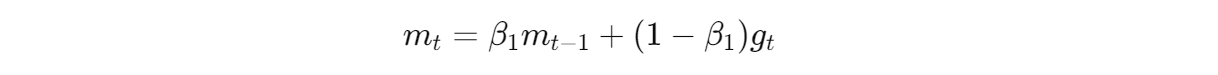

which is an estimate of the gradient's mean (i.e., the average direction of the gradients over time).

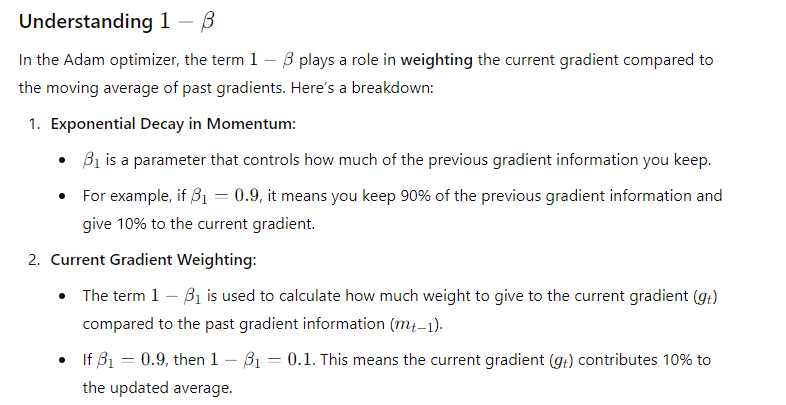

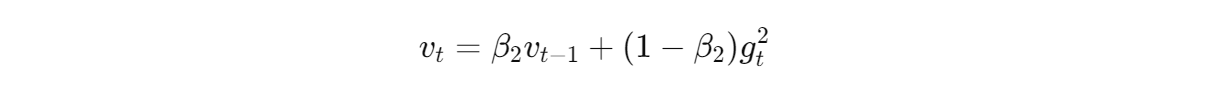


Momentum helps accelerate the optimizer in directions with persistent gradients and dampens oscillations.

Here,
𝑔
𝑡
g
t
​
  is the gradient at time step
𝑡
t, and
𝛽
1
β
1
​
  is a hyperparameter (usually set to 0.9), which controls the decay rate of the moving average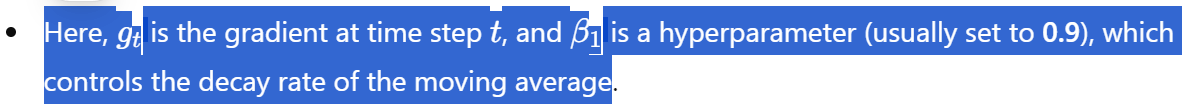

------------------------------
#2. RMSProp (Second Moment Estimate):
Adam also uses an idea similar to RMSProp, where it calculates the exponentially weighted average of the squared gradients to normalize updates.

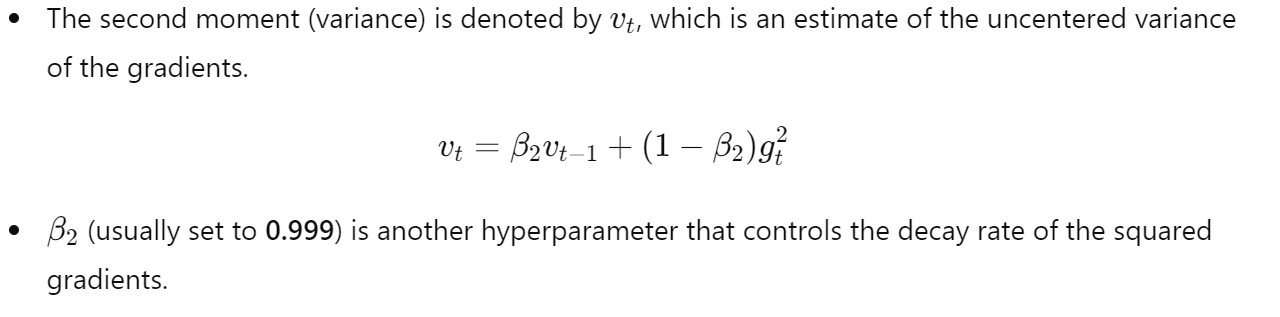

-----------------------------------------
#3. Bias Correction:

 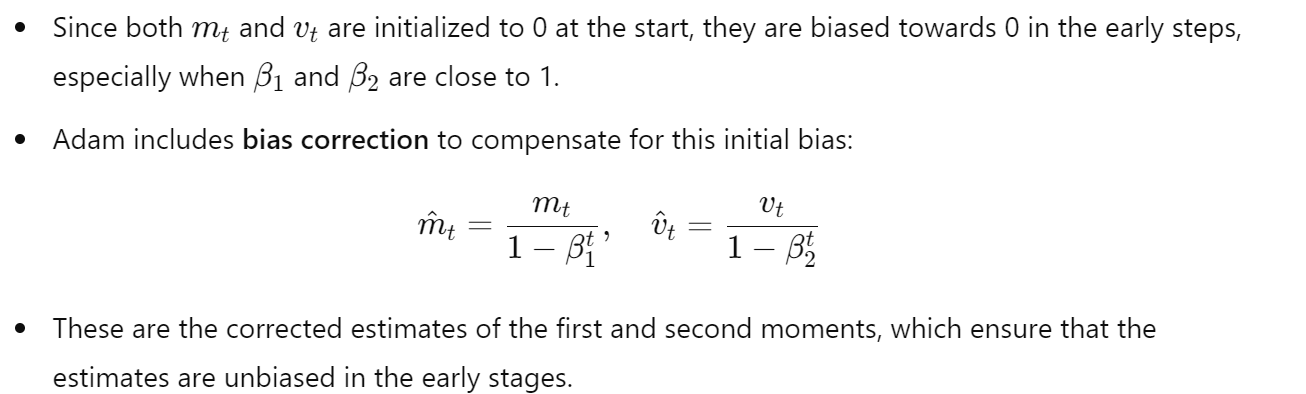

These are the corrected estimates of the first and second moments, which ensure that the estimates are unbiased in the early stages.

----------------------------------------------
#4. Parameter Update:

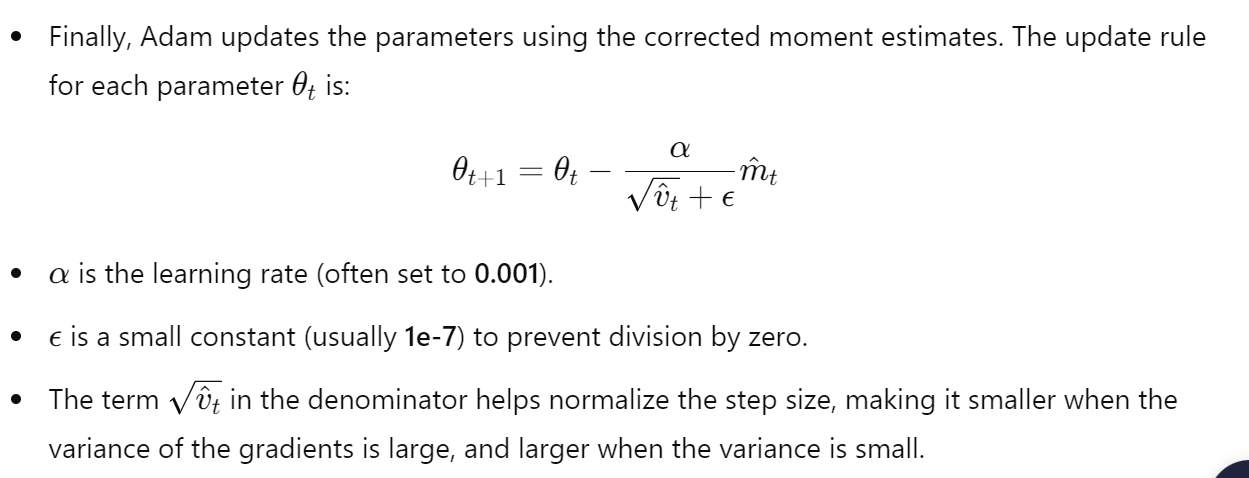

----------------------------------------------
#Summary of the Adam Optimizer's Workflow:
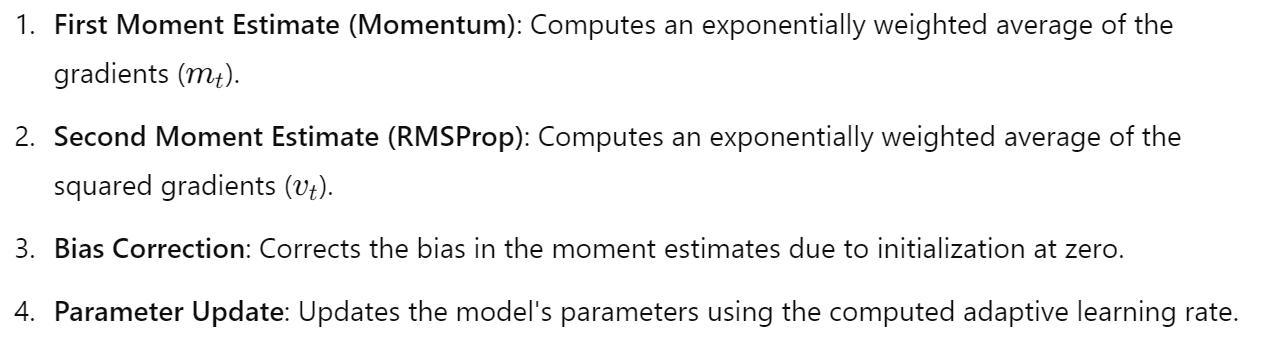

Second Moment Estimate (RMSProp): Computes an exponentially weighted average of the squared gradients

Bias Correction: Corrects the bias in the moment estimates due to initialization at zero.

Parameter Update: Updates the model's parameters using the computed adaptive learning rate.

-----------------------------------------------
#Key Advantages of Adam
Adaptive learning rates: Each parameter has its own learning rate, which helps improve performance and stability.

Efficient and easy to use: Works well for a variety of deep learning problems, requires little tuning.

Combines benefits of Momentum and RMSProp: It speeds up training with momentum and handles noisy or sparse gradients with the squared gradient updates from RMSProp.

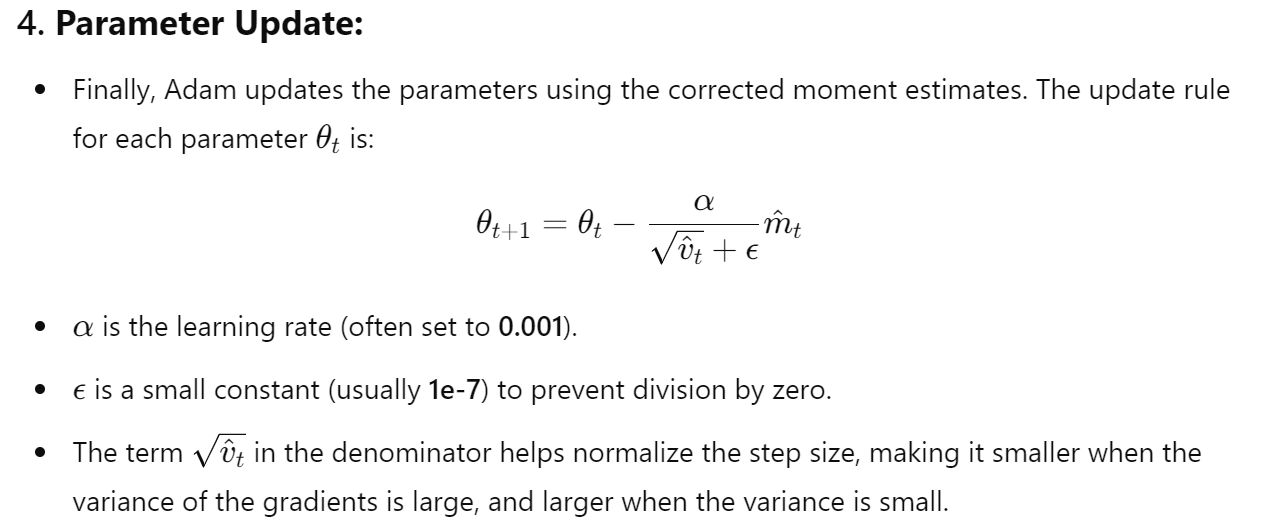

----------------------------------------------------------------
#Why is Adam Popular?
It works well in practice for a wide range of tasks (classification, regression, etc.).

Requires minimal hyperparameter tuning.

Efficient with large datasets and high-dimensional parameter spaces.
Let me know if you'd like to see any specific examples or further clarifications!











In [32]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# EarlyStopping
This is a technique used during training to stop the process early if the model's performance on a validation set stops improving.

--------------------------
# 1. It helps prevent overfitting by halting training when further epochs are not helping the model generalize better.

------------------------------
# 2. Parameters Explained:
    monitor='val_loss':

This tells the early stopping mechanism to monitor the validation loss (val_loss).

The validation loss is a measure of how well the model performs on unseen data (i.e., data not used for training).

The early stopping will look at how this loss behaves after each epoch.
mode='min':

This specifies that we want to stop training when the monitored value (validation loss) is minimized.

The goal is to minimize the validation loss because lower loss generally means better model performance.

If you were monitoring a metric that should be maximized (like accuracy), you would use mode='max'.
verbose=1:

This controls how much information is printed to the console. With verbose=1, a message will be printed when early stopping is triggered.

    patience=25

The patience parameter specifies how many epochs the model is allowed to continue training without improvement in the monitored metric (in this case, validation loss) before stopping.

So, if the validation loss doesn't improve for 25 consecutive epochs, the training will stop early.

----------------------
#Example Scenario
If your model’s validation loss has been decreasing for the first 50 epochs but then flattens out and doesn’t improve for the next 25 epochs, early stopping will stop training at the 75th epoch (because patience is set to 25).

-----------------------
#Why Use Early Stopping?
Prevents Overfitting: Training too long might make the model fit the training data too well, causing it to perform poorly on new data (overfitting).

Saves Time: It stops the training when it’s clear that the model has already learned as much as it can, preventing unnecessary computation.
Let me know if you'd like more details on any of these points!








In [31]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Fit the model with EarlyStopping callback
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.6959 - val_loss: 0.6775
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6618 - val_loss: 0.6464
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6319 - val_loss: 0.6053
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5957 - val_loss: 0.5587
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5473 - val_loss: 0.5079
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4944 - val_loss: 0.4511
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4334 - val_loss: 0.3984
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3992 - val_loss: 0.3491
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3514 - val_loss: 0.3069
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2911 - val_loss: 0.2760
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2743 - val_loss: 0.2435
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 

# 1. What are Callbacks?
Callbacks are special functions or blocks of code that are executed at certain stages of the training process, such as at the end of each epoch.

They allow you to perform actions like saving the model, adjusting the learning rate, or stopping training based on specific criteria.

--------------------------
# 2. The callbacks=[early_stop]:
This line means you are specifying a list of callbacks to be used during the training process.

In this case, the list contains a single callback, which is early_stop (an instance of EarlyStopping).

When you include this in the fit() function, the model will use the early stopping mechanism during training.

--------------------
#Example in Context:

    model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stop])

--------------------
##Training Process:

The model will train for a maximum of 100 epochs.

At the end of each epoch, it evaluates the validation loss (val_loss).

--------------------
##Early Stopping in Action:
The early_stop callback monitors the val_loss.

If the validation loss stops improving (i.e., no improvement for patience=25 epochs), early stopping will trigger, and the training process will halt.

-------------------
##Why Put early_stop in a List?:

Callbacks are passed as a list because you can use multiple callbacks during training.

For example, you might use both early stopping and a model checkpoint to save the best model.

If you only have one callback, you still pass it in as a list to maintain consistency with the function’s design.

--------------------------
#Key Benefits
Efficiency: Prevents wasting time on additional epochs when the model is no longer improving.

Flexibility: You can easily add more callbacks (like saving the model or adjusting learning rates).

<Axes: >

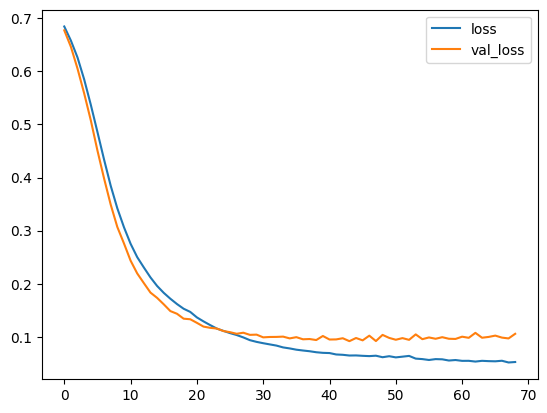

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [63]:
from tensorflow.keras.layers import Dropout

In [64]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [65]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.7083 - val_loss: 0.6802
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6819 - val_loss: 0.6617
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6667 - val_loss: 0.6410
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6475 - val_loss: 0.6112
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6273 - val_loss: 0.5727
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5950 - val_loss: 0.5409
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5602 - val_loss: 0.5026
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5375 - val_loss: 0.4615
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4814 - val_loss: 0.4250
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4784 - val_loss: 0.3904
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4617 - val_loss: 0.3640
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

<Axes: >

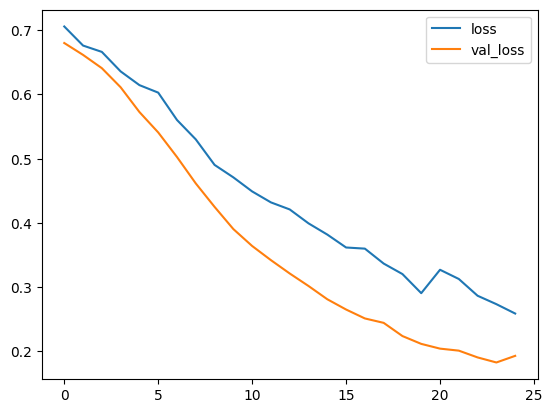

In [66]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [ ]:
# Use predict() method instead of predict_classes()
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [31]:
predictions = model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
